Import all the necessary libraries.
Tensorflow without intel extension.
Import VGG16 pre trained model.

In [1]:
import os
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model



Define the path to the dataset.

In [2]:

# Define the path to your dataset
data_dir = r"C:\Users\rbsra\OneDrive\Desktop\stuff\archive"


ImageDatagenerator to utilise data augmentation for increased diversity of the data fed into the model for improved accuracy

In [3]:

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


Initilise values for batch_size, target_size. model used here is MobileNetV2 consisting of three customised layers


Found 5712 images belonging to 4 classes.


Epoch 1/10
179/179 [==============================] - 116s 599ms/step - loss: 0.4839 - accuracy: 0.8452
Epoch 2/10
179/179 [==============================] - 79s 442ms/step - loss: 0.2786 - accuracy: 0.9025
Epoch 3/10
179/179 [==============================] - 79s 444ms/step - loss: 0.2133 - accuracy: 0.9298
Epoch 4/10
179/179 [==============================] - 79s 440ms/step - loss: 0.1874 - accuracy: 0.9335
Epoch 5/10
179/179 [==============================] - 79s 439ms/step - loss: 0.1775 - accuracy: 0.9386
Epoch 6/10
179/179 [==============================] - 79s 439ms/step - loss: 0.1707 - accuracy: 0.9417
Epoch 7/10
179/179 [==============================] - 79s 439ms/step - loss: 0.1544 - accuracy: 0.9463
Epoch 8/10
179/179 [==============================] - 81s 454ms/step - loss: 0.1526 - accuracy: 0.9477
Epoch 9/10
179/179 [==============================] - 81s 454ms/step - loss: 0.1225 - accuracy: 0.9576
Epoch 10/10
179/179 [==============================] - 79s 442ms/step - 

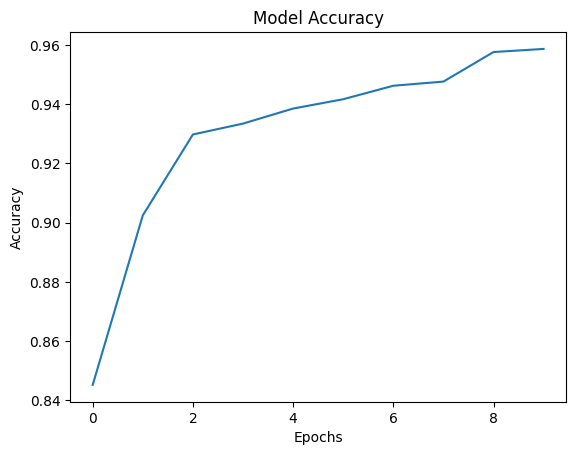

Total runtime: 831.35 seconds


In [4]:

# Create a data generator for training data
batch_size = 32
target_size = (128, 128)  # Reduce the image size
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, "Training"),
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=True
)

# Load a pre-trained MobileNetV2 model without the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add your custom top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # Match the number of classes in your dataset

# Create a new model by combining the base model and custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001),  # You can adjust the learning rate as needed
              loss='categorical_crossentropy',  # Use the appropriate loss function
              metrics=['accuracy'])  # You can add more metrics if needed

# Record start time
start_time = time.time()

# Train the model and record history
history = model.fit(
    train_generator,
    epochs=10
)

# Record end time
end_time = time.time()

# Plot the accuracy graph
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Calculate and print the runtime
runtime = end_time - start_time
print(f"Total runtime: {runtime:.2f} seconds")